<a href="https://colab.research.google.com/github/2303A51174/23CSBTB39-40/blob/main/assignment04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ASSIGNMENT:-04
HTLNO:-2303A52331

Linear regression primer
1.Import packages and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv("USA_Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Check basic info on the data set
'info()' method to check the data types and number

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


'describe()' method to get the statistical summary of the various features of the data set

In [8]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
10%,2.835000e+06,3000.000000,2.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
90%,7.350000e+06,7980.000000,4.000000,2.000000,3.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


'columns' method to get the names of the columns (features)

In [9]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

Basic plotting and visualization on the data set
Pairplots using seaborn

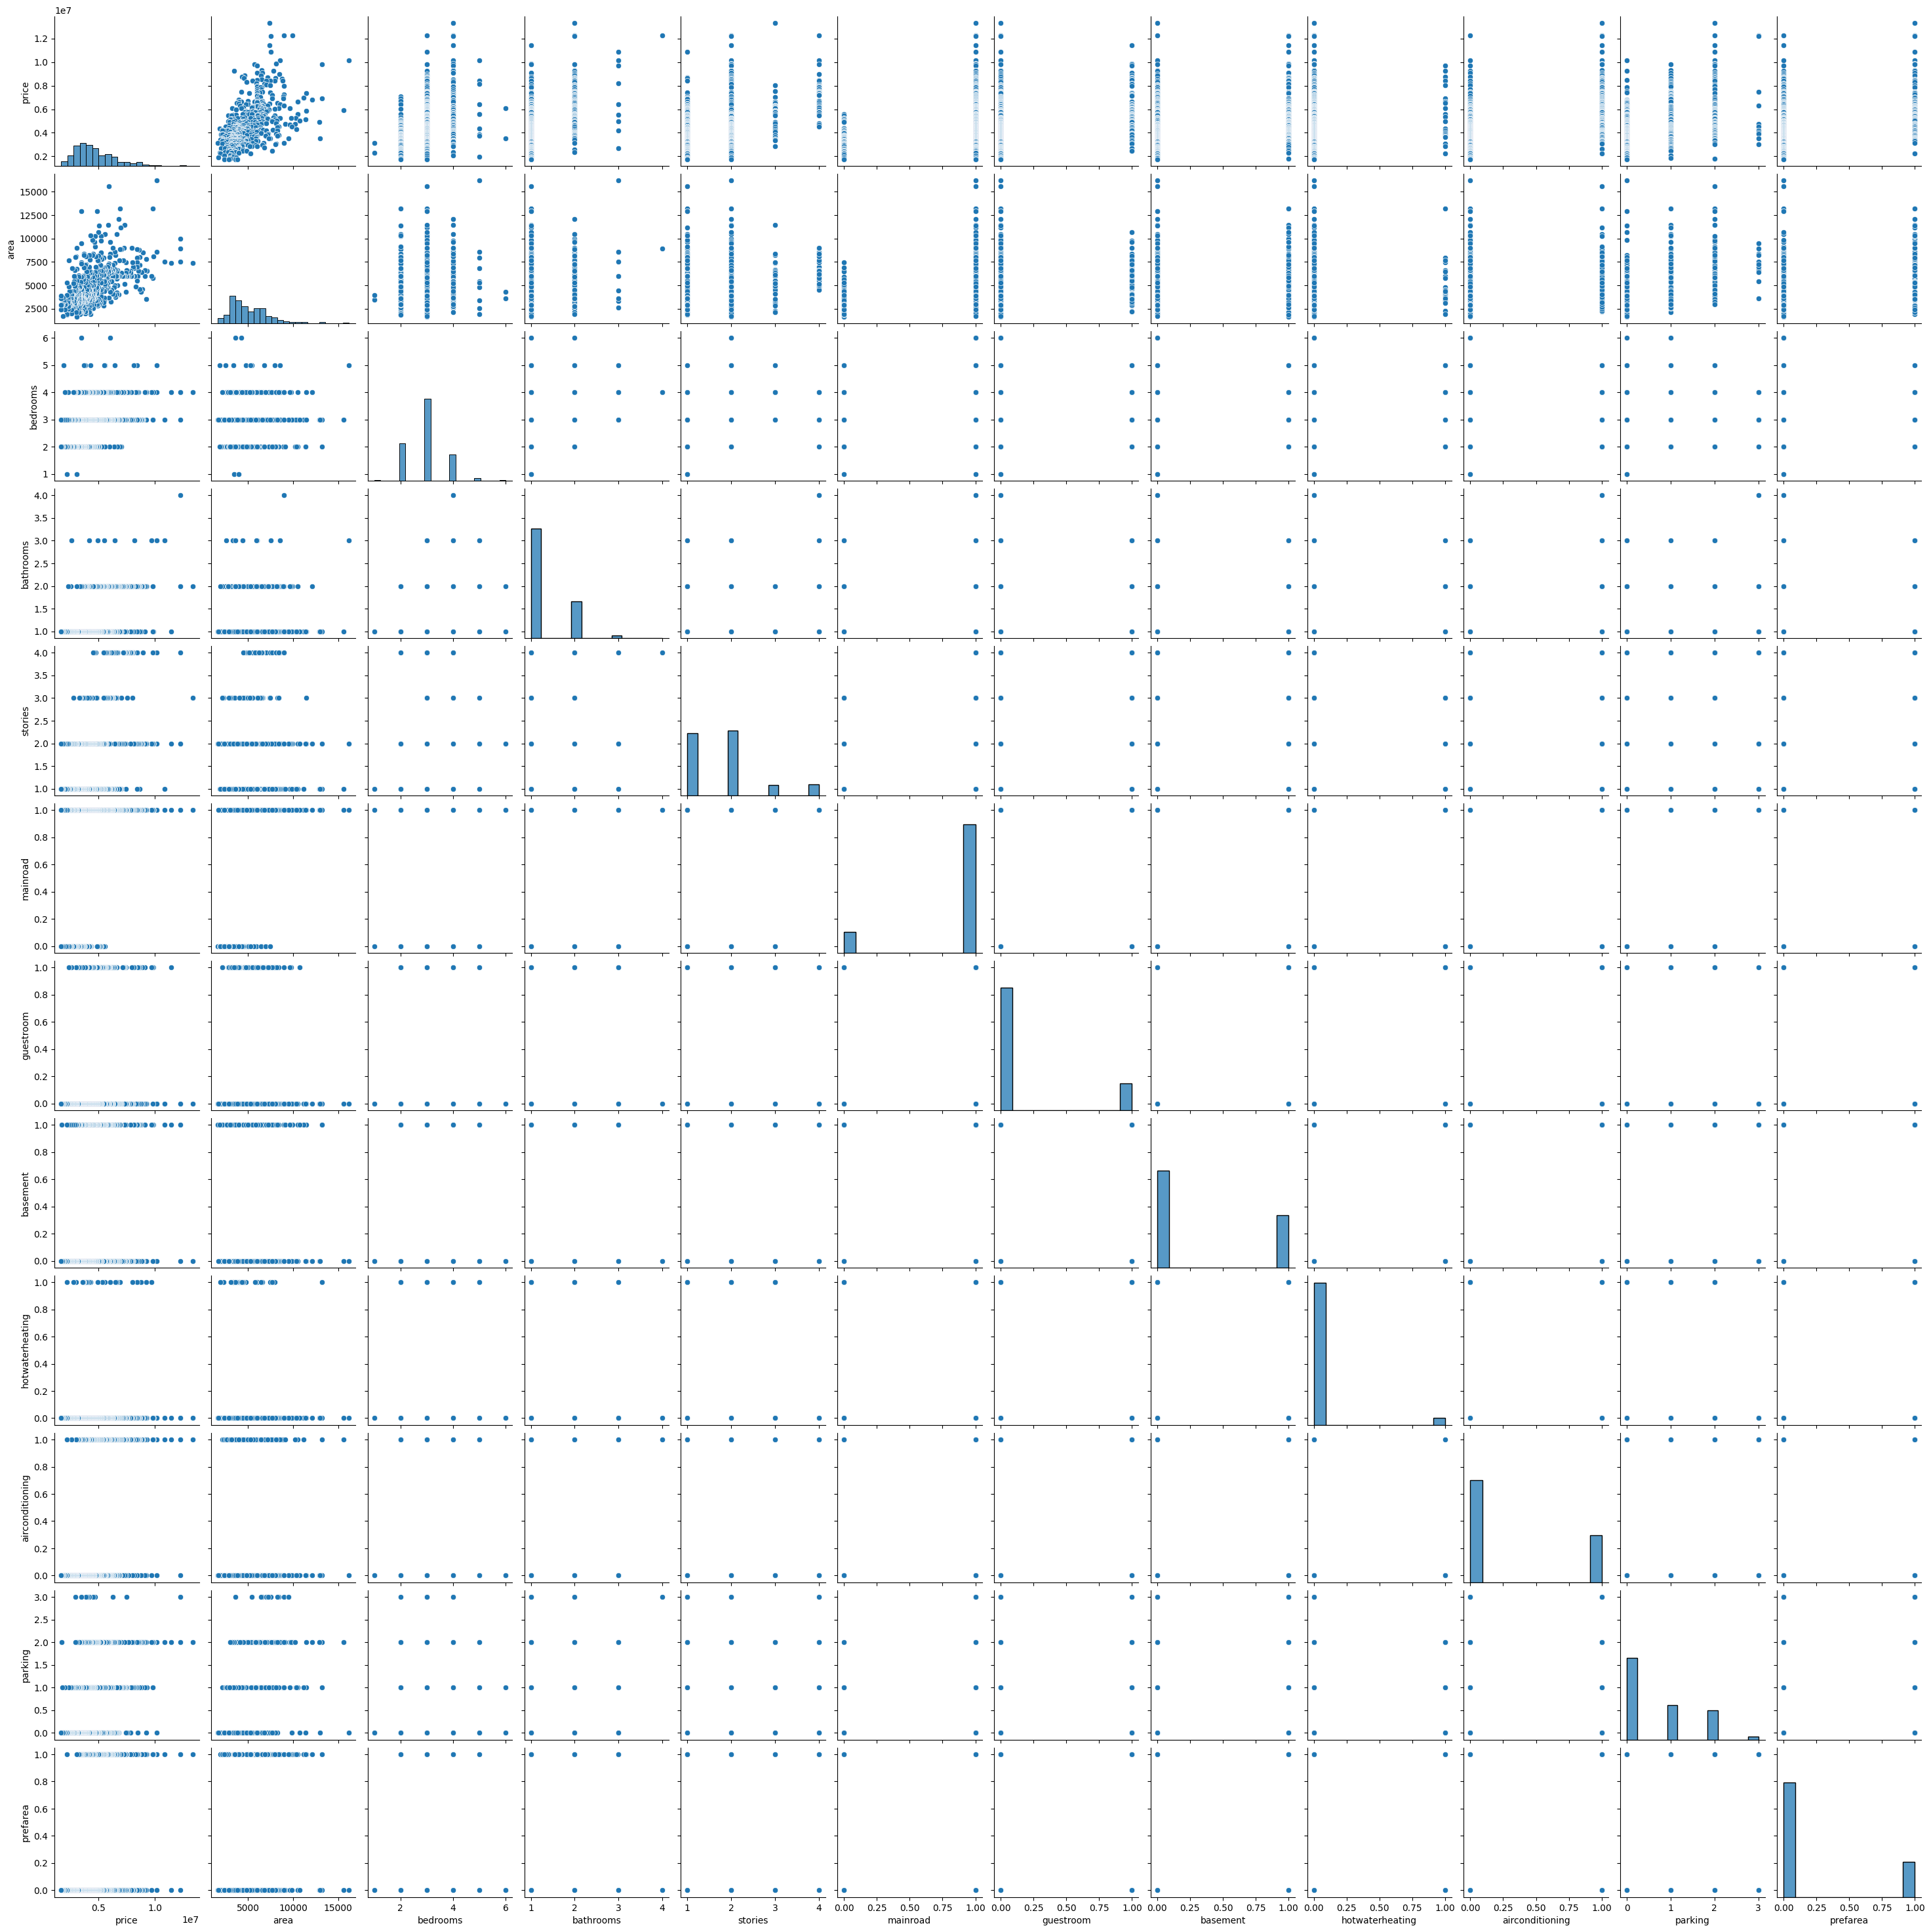

In [58]:
sns.pairplot(df)


  Distribution of price (the predicted quantity)

<Axes: ylabel='Frequency'>

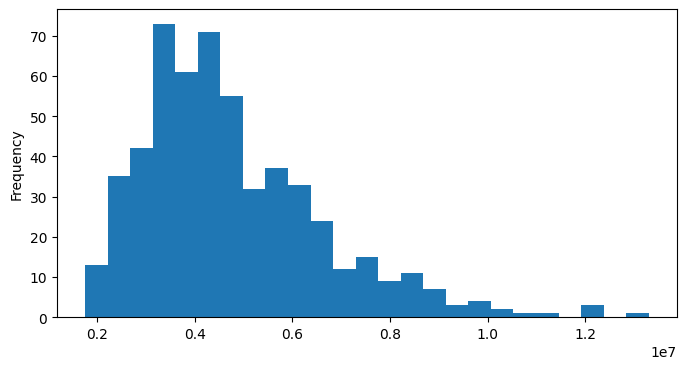

In [15]:
df['price'].plot.hist(bins=25,figsize=(8,4))

<Axes: ylabel='Density'>

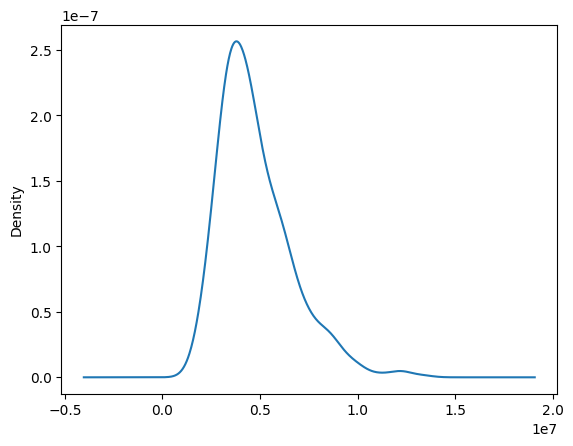

In [17]:
df['price'].plot.density()

In [20]:
for col in df.columns:
         print(df[col].unique())

[13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000  6685000  6650000  6629000  6615000
  6580000  6510000  6475000  6440000  6419000  6405000  6300000  6293000
  6265000  6230000  6195000  6160000  6125000  6107500  6090000  6083000
  6020000  5950000  5943000  5880000  5873000  5866000  5810000  5803000
  5775000  5740000  5652500  5600000  5565000  5530000  5523000  5495000
  5460000  5425000  5390000  5383000  5320000  5285000  5250000  5243000
  5229000  5215000  5145000  5110000  5075000  5040000  5033000  5005000
  4970000  4956000  4935000  4907000  4900000  4893

In [26]:
l_column = list(df.columns) # Making a list out of column names
len_feature = len(l_column) # Length of column vector list
l_column

['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [27]:
X = df[l_column[0:len_feature-2]]
y = df[l_column[len_feature-2]]

In [28]:
print("Feature set size:",X.shape)
print("Variable set size:",y.shape)

Feature set size: (545, 11)
Variable set size: (545,)


In [31]:
X.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking
0,13300000,7420,4,2,3,1,0,0,0,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3
2,12250000,9960,3,2,2,1,0,1,0,0,2
3,12215000,7500,4,2,2,1,0,1,0,1,3
4,11410000,7420,4,1,2,1,1,1,0,1,2


In [32]:
y.head()

,prefarea
0,1
1,0
2,1
3,1
4,0


In [33]:
from sklearn.model_selection import train_test_split

In [35]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (381, 11)
Test feature set size: (164, 11)
Training variable set size: (381,)
Test variable set size: (164,)


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.3, random_state=123)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [37]:
lm = LinearRegression() # Creating a Linear Regression object 'lm'

In [60]:
lm.fit(X_train,y_train)

LinearRegression()

In [39]:
print("The intercept term of the linear model:", lm.intercept_)

The intercept term of the linear model: -0.13083951219548498


In [40]:
print("The coefficients of the linear model:", lm.coef_)

The coefficients of the linear model: [ 9.50678186e-08  1.06274453e-05 -2.25298361e-03 -1.38060762e-01
 -2.27103755e-02  8.98439081e-02  6.94849036e-03  1.71264912e-01
 -1.38071412e-01 -6.50205735e-02 -3.21664695e-02]


In [41]:
#idict = {'Coefficients':lm.intercept_}
#idf = pd.DataFrame(data=idict,index=['Intercept'])
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
#cdf=pd.concat([idf,cdf], axis=0)
cdf

,Coefficients
price,9.506782e-08
area,1.062745e-05
bedrooms,-2.252984e-03
bathrooms,-1.380608e-01
stories,-2.271038e-02
mainroad,8.984391e-02
guestroom,6.948490e-03
basement,1.712649e-01
hotwaterheating,-1.380714e-01
airconditioning,-6.502057e-02


KeyError: 'Price'

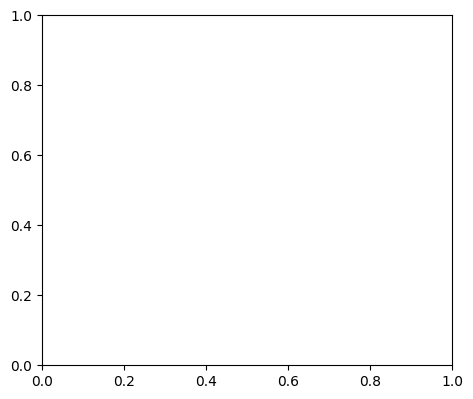

In [45]:
l=list(cdf.index)
from matplotlib import gridspec
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2,3)
#f, ax = plt.subplots(nrows=1,ncols=len(l), sharey=True)
ax0 = plt.subplot(gs[0])
ax0.scatter(df[l[0]],df['Price'])
ax0.set_title(l[0]+" vs. Price", fontdict={'fontsize':20})

ax1 = plt.subplot(gs[1])
ax1.scatter(df[l[1]],df['Price'])
ax1.set_title(l[1]+" vs. Price",fontdict={'fontsize':20})

ax2 = plt.subplot(gs[2])
ax2.scatter(df[l[2]],df['Price'])
ax2.set_title(l[2]+" vs. Price",fontdict={'fontsize':20})

ax3 = plt.subplot(gs[3])
ax3.scatter(df[l[3]],df['Price'])
ax3.set_title(l[3]+" vs. Price",fontdict={'fontsize':20})

ax4 = plt.subplot(gs[4])
ax4.scatter(df[l[4]],df['Price'])
ax4.set_title(l[4]+" vs. Price",fontdict={'fontsize':20})

Text(0.5, 1.0, 'stories vs. Price')

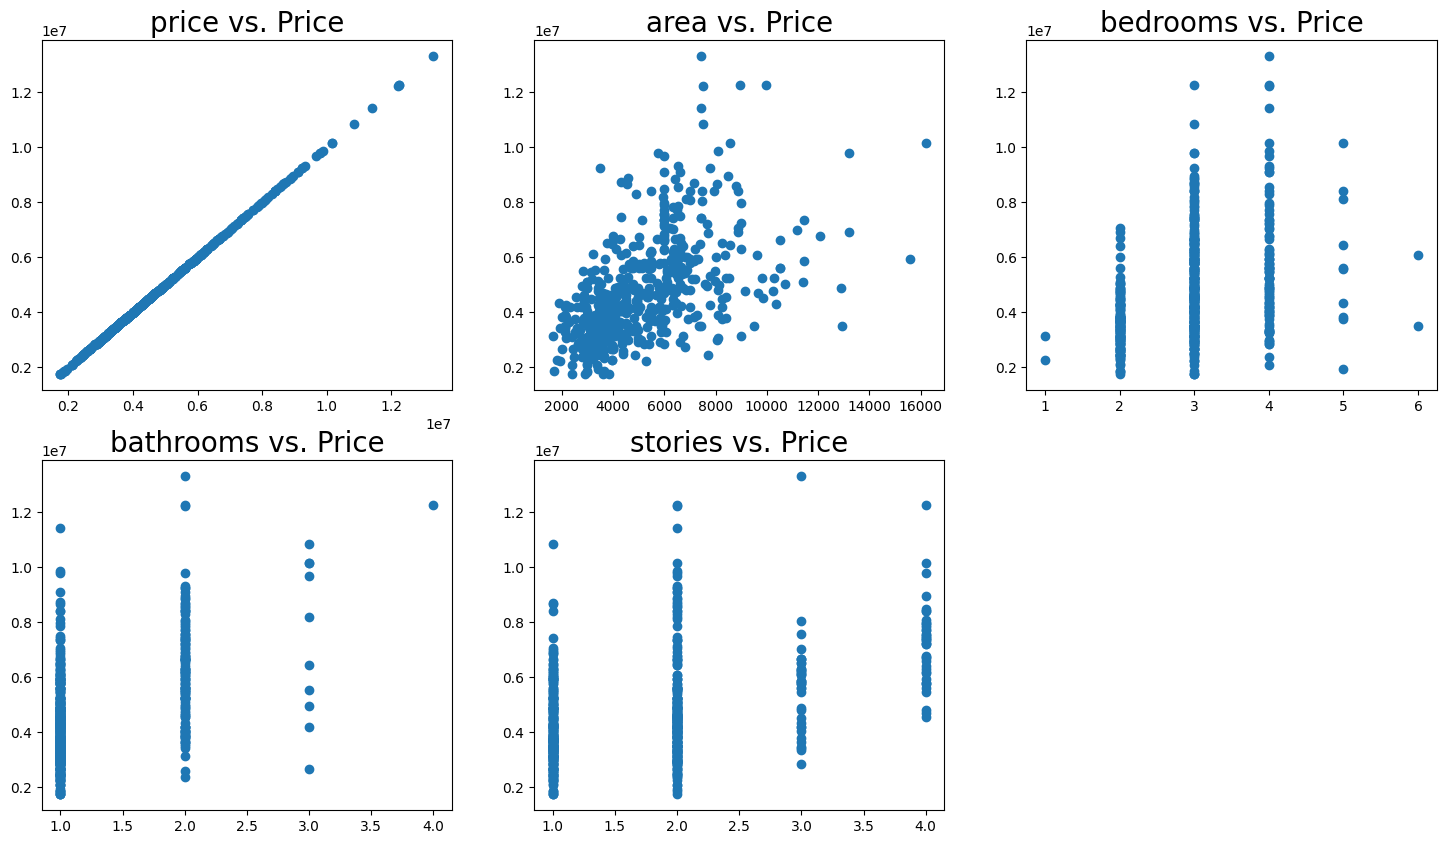

In [46]:
l=list(cdf.index)
from matplotlib import gridspec
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2,3)
#f, ax = plt.subplots(nrows=1,ncols=len(l), sharey=True)
ax0 = plt.subplot(gs[0])

# Check the correct column name for 'Price'
# in the DataFrame 'df' and update accordingly.
# For instance if the column name is 'price',
# use the following line
ax0.scatter(df[l[0]],df['price']) # Changed 'Price' to 'price'

ax0.set_title(l[0]+" vs. Price", fontdict={'fontsize':20})

ax1 = plt.subplot(gs[1])
ax1.scatter(df[l[1]],df['price']) # Changed 'Price' to 'price'
ax1.set_title(l[1]+" vs. Price",fontdict={'fontsize':20})

ax2 = plt.subplot(gs[2])
ax2.scatter(df[l[2]],df['price']) # Changed 'Price' to 'price'
ax2.set_title(l[2]+" vs. Price",fontdict={'fontsize':20})

ax3 = plt.subplot(gs[3])
ax3.scatter(df[l[3]],df['price']) # Changed 'Price' to 'price'
ax3.set_title(l[3]+" vs. Price",fontdict={'fontsize':20})

ax4 = plt.subplot(gs[4])
ax4.scatter(df[l[4]],df['price']) # Changed 'Price' to 'price'
ax4.set_title(l[4]+" vs. Price",fontdict={'fontsize':20})

In [48]:
# Assuming you have a trained model named 'lm' and a training dataset 'X_train'
train_pred = lm.predict(X_train) # Generate predictions on the training data

print("R-squared value of this fit:",round(metrics.r2_score(y_train,train_pred),3))

R-squared value of this fit: 0.202


In [49]:
predictions = lm.predict(X_test)
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (164,)


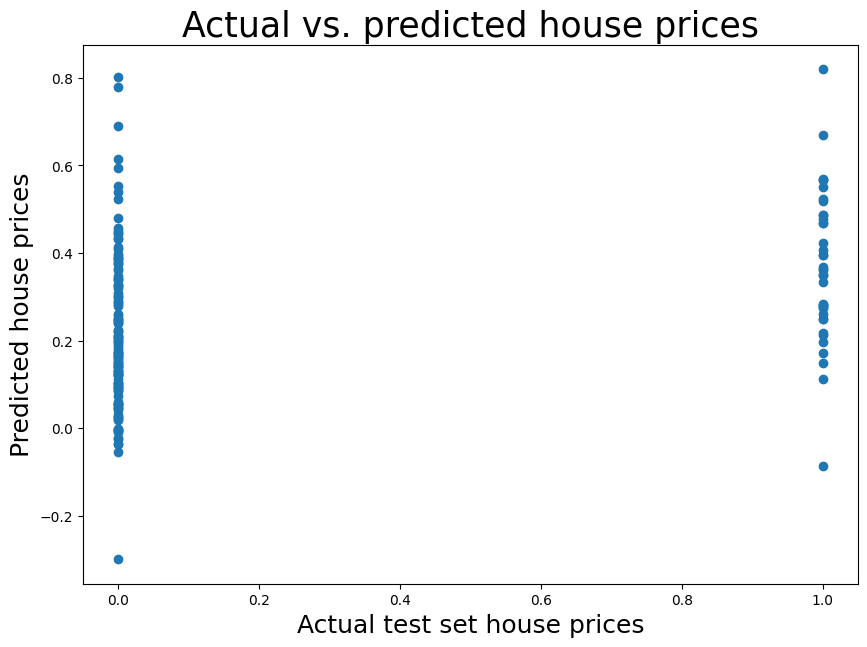

In [50]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted house prices",fontsize=25)
plt.xlabel("Actual test set house prices",fontsize=18)
plt.ylabel("Predicted house prices", fontsize=18)
plt.scatter(x=y_test,y=predictions)

<Axes: title={'center': 'Histogram of residuals to check for normality'}, xlabel='Residuals', ylabel='Kernel density'>

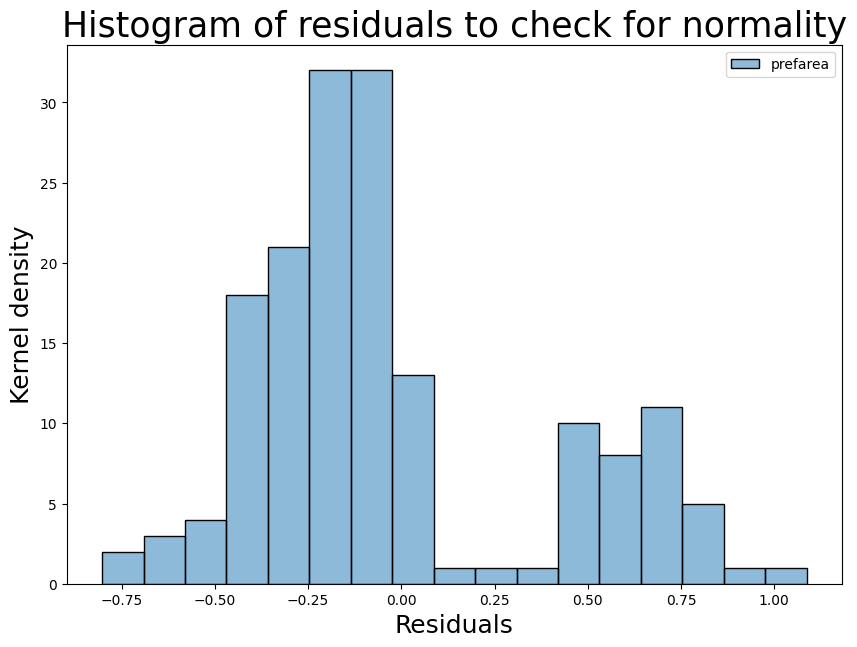

In [51]:
plt.figure(figsize=(10,7))
plt.title("Histogram of residuals to check for normality",fontsize=25)
plt.xlabel("Residuals",fontsize=18)
plt.ylabel("Kernel density", fontsize=18)
sns.histplot([y_test-predictions])

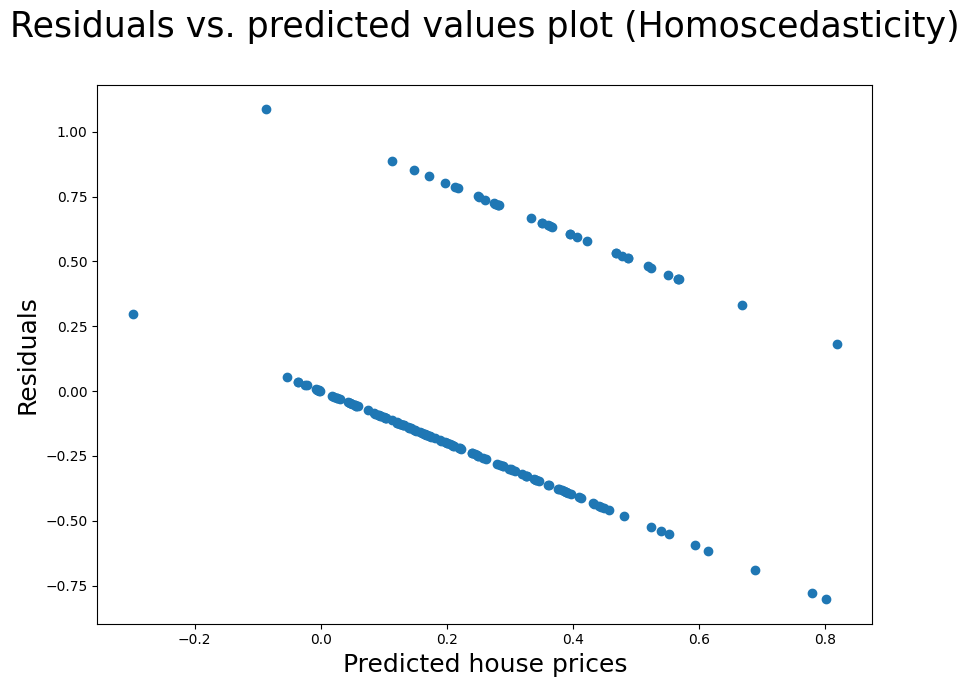

In [52]:
plt.figure(figsize=(10,7))
plt.title("Residuals vs. predicted values plot (Homoscedasticity)\n",fontsize=25)
plt.xlabel("Predicted house prices",fontsize=18)
plt.ylabel("Residuals", fontsize=18)
plt.scatter(x=predictions,y=y_test-predictions)

In [53]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean absolute error (MAE): 0.31858432202793097
Mean square error (MSE): 0.15906395173922414
Root mean square error (RMSE): 0.3988282233483786


In [54]:
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

R-squared value of predictions: 0.106


In [55]:
#compute minmax value for observed price and expected price
import numpy as np
min=np.min(predictions/6000)
max=np.max(predictions/12000)
print(min, max)

-4.9799164072049135e-05 6.830366092013385e-05


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([846719.71863815, 846719.81863815, 846719.91863815, 846720.01863815,
        846720.11863815, 846720.21863815, 846720.31863815, 846720.41863815,
        846720.51863815, 846720.61863815, 846720.71863815]),
 <BarContainer object of 10 artists>)

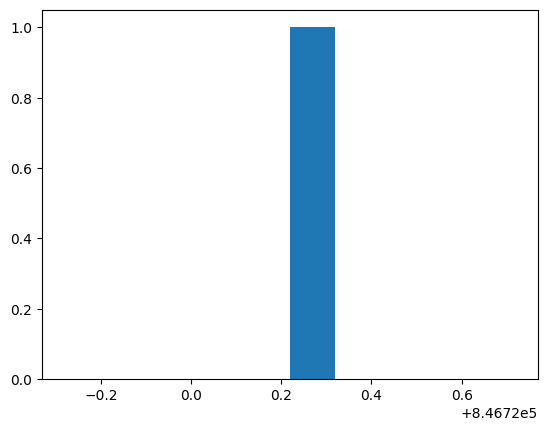

In [56]:
#Compute MinMax value for Price=100
L = (100 - min)/(max - min)
L
plt.hist(L)